<A> Importing necessary libraries

In [1]:
# Data manipulation
import numpy as np
import pandas as pd
import os

# Machine learning models
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, SVR
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.neural_network import MLPClassifier

#Data Cleaning
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

#Feature Selection
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

# Deep learning models
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

# Checking versions of some libraries
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("TensorFlow version:", tf.__version__)


# Importing necessary libraries for metrics
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

NumPy version: 1.21.6
Pandas version: 1.3.5
TensorFlow version: 2.10.1


<a>Importing Datasets 

In [2]:
data_dir = "C:/Users/ankit/Downloads/Binary Classification with a Bank Churn/dataset"
train_data = pd.read_csv(os.path.join(data_dir, "train.csv"))
test_data = pd.read_csv(os.path.join(data_dir, "test.csv"))


<a>Pre-processing

In [3]:
train_data.head(10)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
5,5,15771669,Genovese,588,Germany,Male,36.0,4,131778.58,1,1.0,0.0,136024.31,1
6,6,15692819,Ch'ang,593,France,Female,30.0,8,144772.69,1,1.0,0.0,29792.11,0
7,7,15669611,Chukwuebuka,678,Spain,Male,37.0,1,138476.41,1,1.0,0.0,106851.60,0
8,8,15691707,Manna,676,France,Male,43.0,4,0.00,2,1.0,0.0,142917.13,0
9,9,15591721,Cattaneo,583,Germany,Male,40.0,4,81274.33,1,1.0,1.0,170843.07,0


In [4]:
train_data.shape

(165034, 14)

In [5]:
train_data.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
test_data.shape

(110023, 13)

In [7]:
test_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [9]:
train_data.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
test_data.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [11]:
train_data.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
test_data.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

<a>Exploratory Data Analysis (EDA)

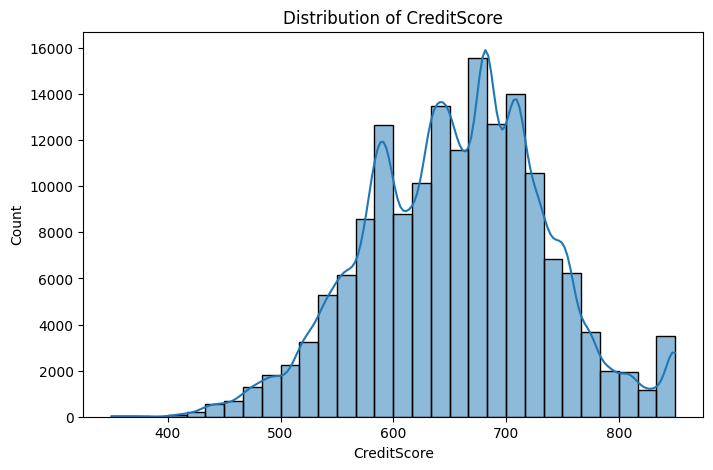

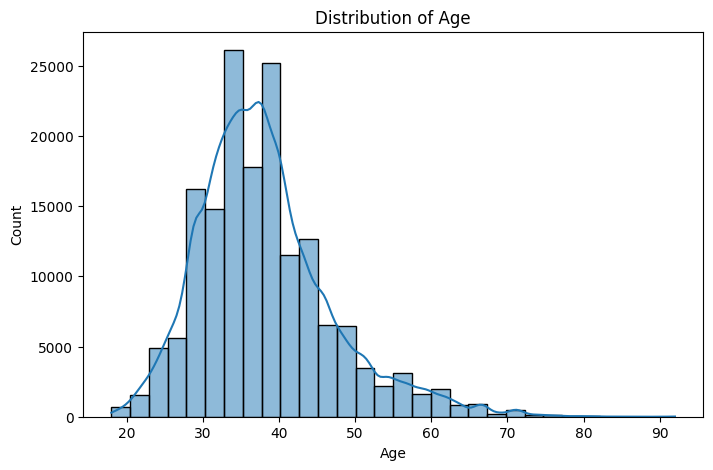

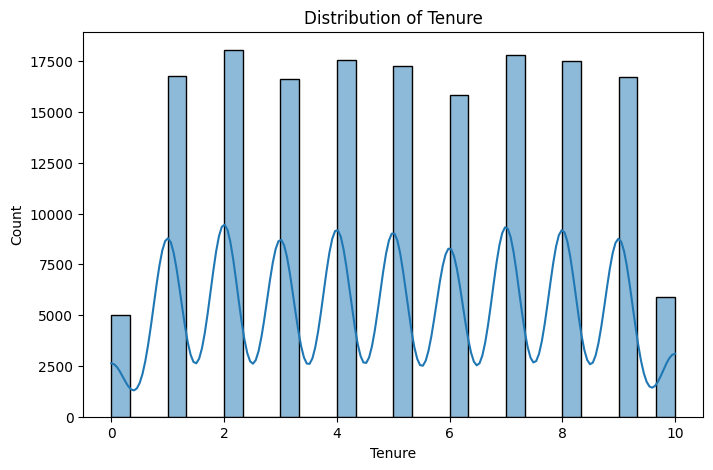

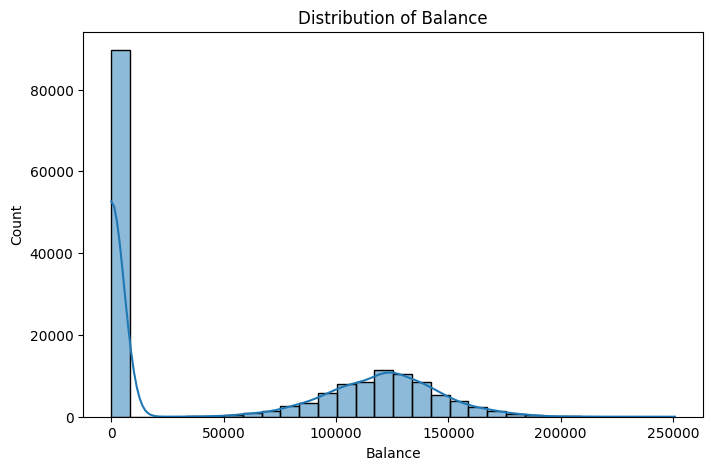

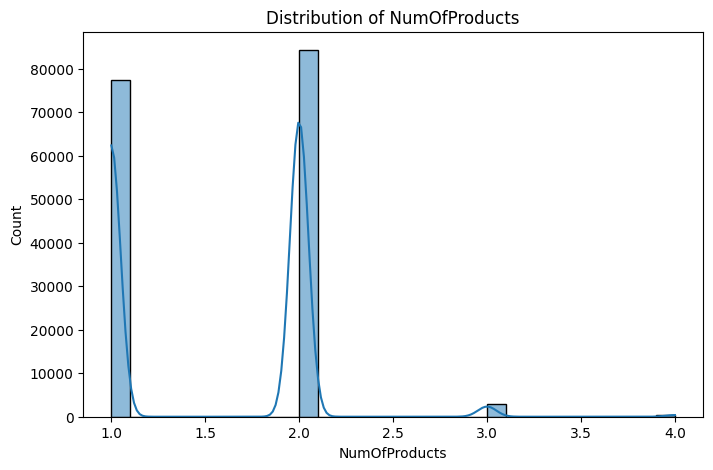

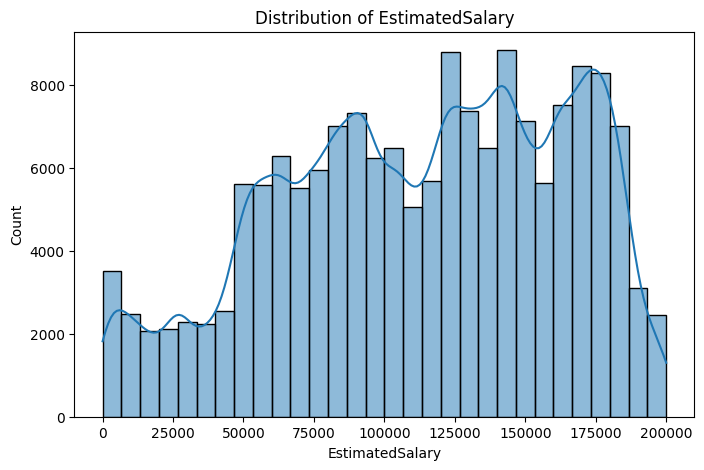

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numeric columns
numeric_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Plot histograms
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(train_data[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


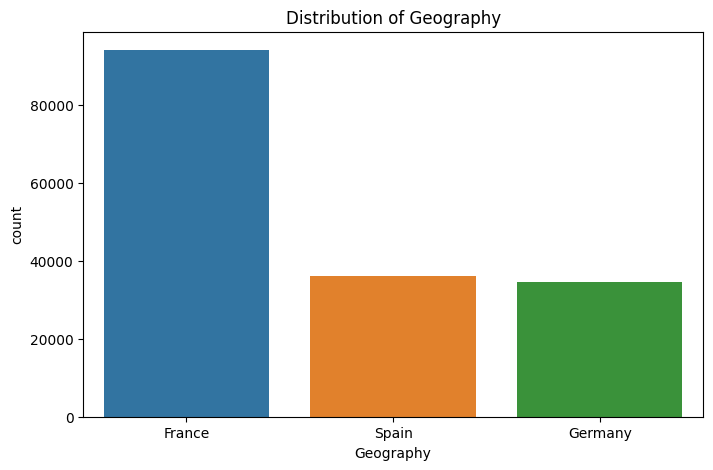

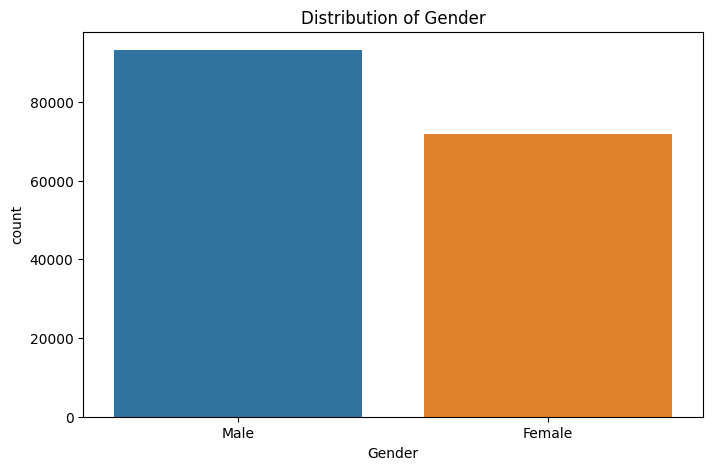

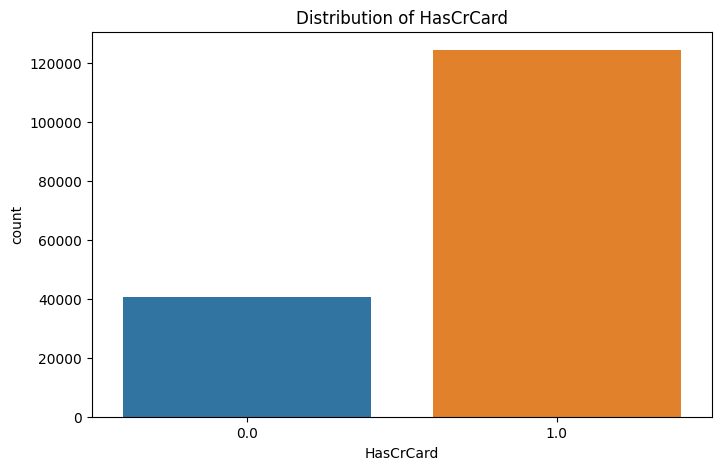

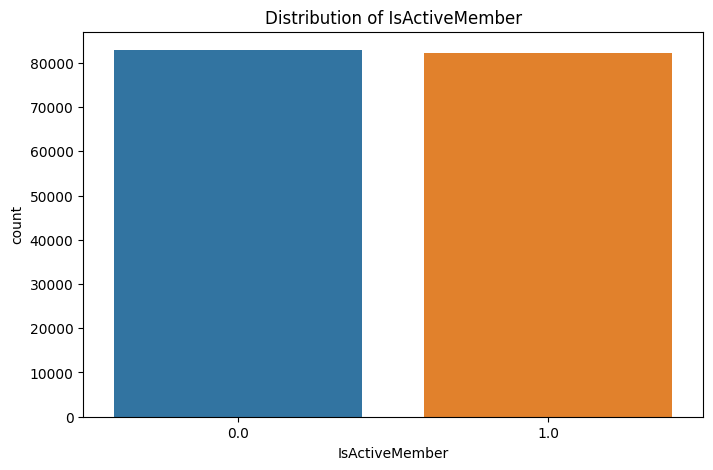

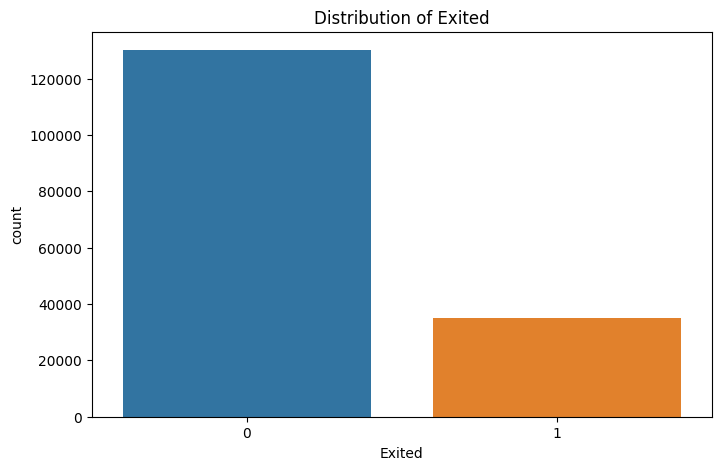

In [14]:
# Categorical columns
categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']

# Plot bar plots
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=column, data=train_data)
    plt.title(f'Distribution of {column}')
    plt.show()


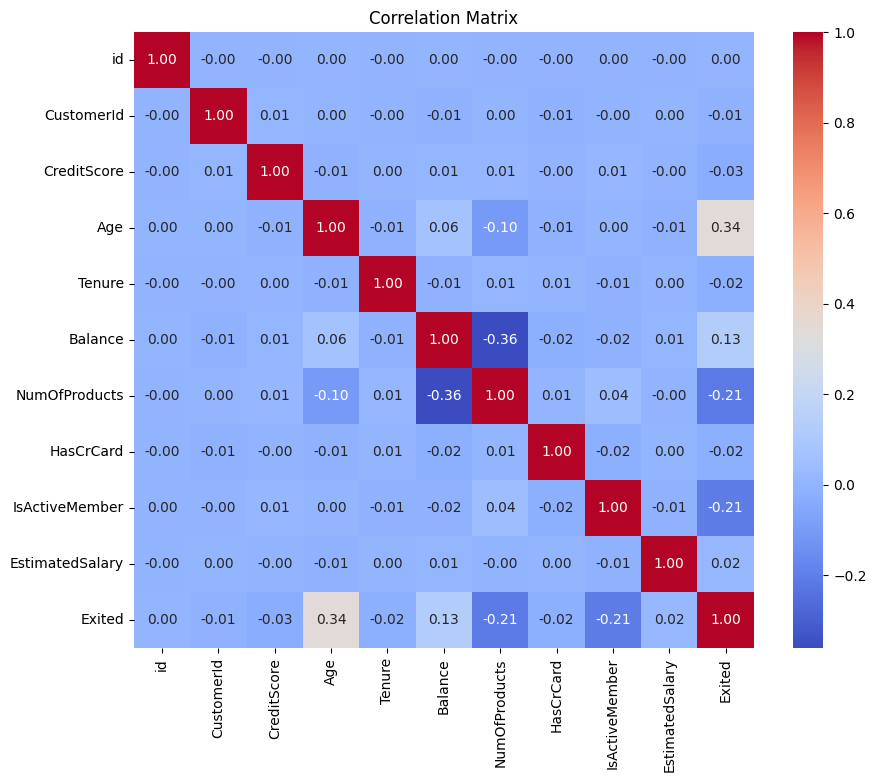

In [15]:
# Correlation matrix
correlation_matrix = train_data.corr()

# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


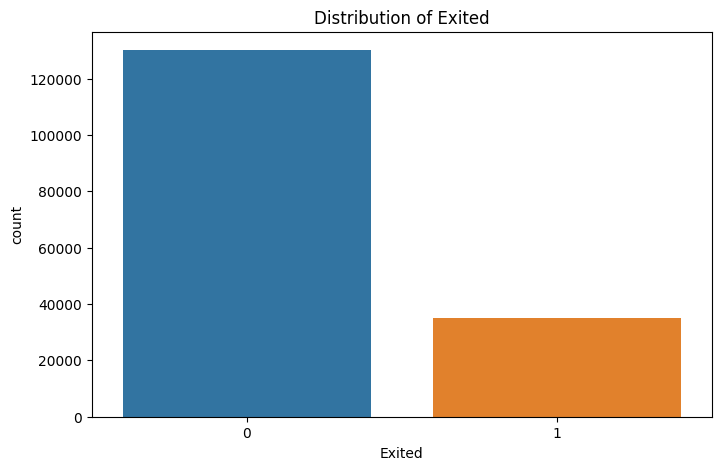

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Exited', data=train_data)
plt.title('Distribution of Exited')
plt.show()


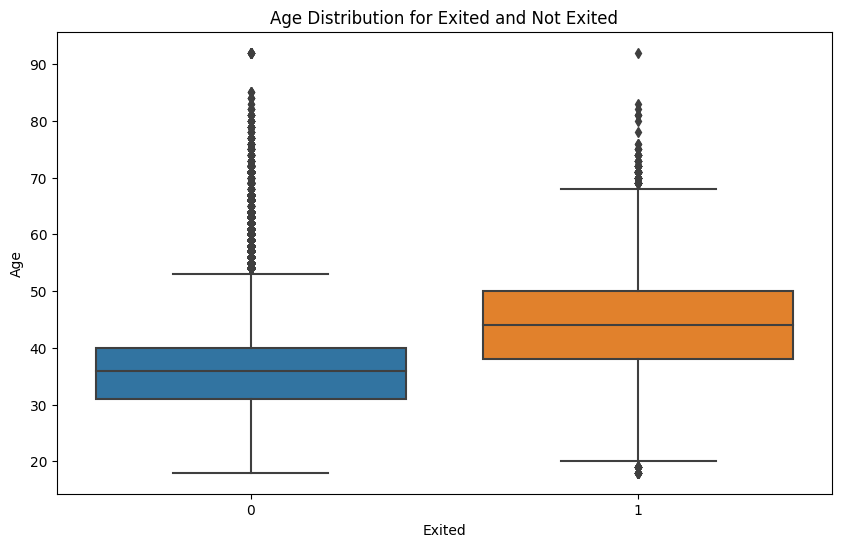

In [17]:
#  Box plots to compare the 'Age' distribution for different values of 'Exited'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Age', data=train_data)
plt.title('Age Distribution for Exited and Not Exited')
plt.show()


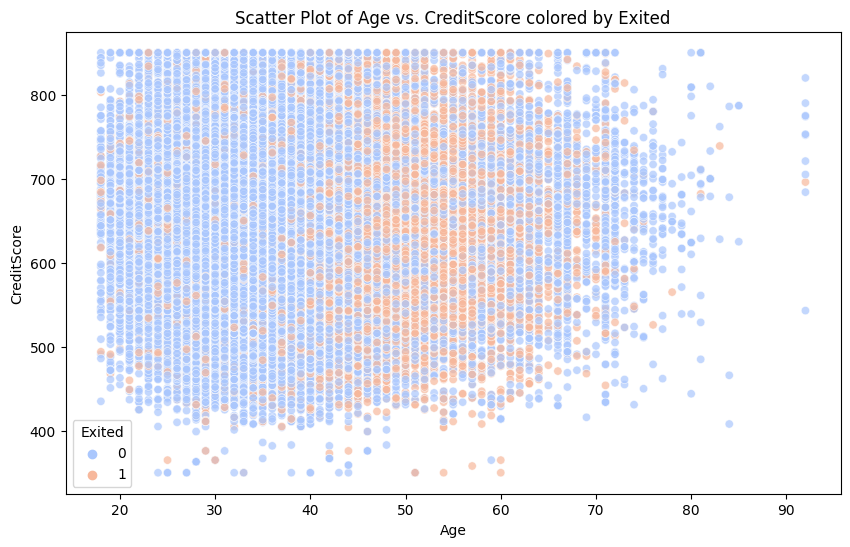

In [18]:
#Age and CreditScore: Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='CreditScore', data=train_data, hue='Exited', palette='coolwarm', alpha=0.7)
plt.title('Scatter Plot of Age vs. CreditScore colored by Exited')
plt.show()


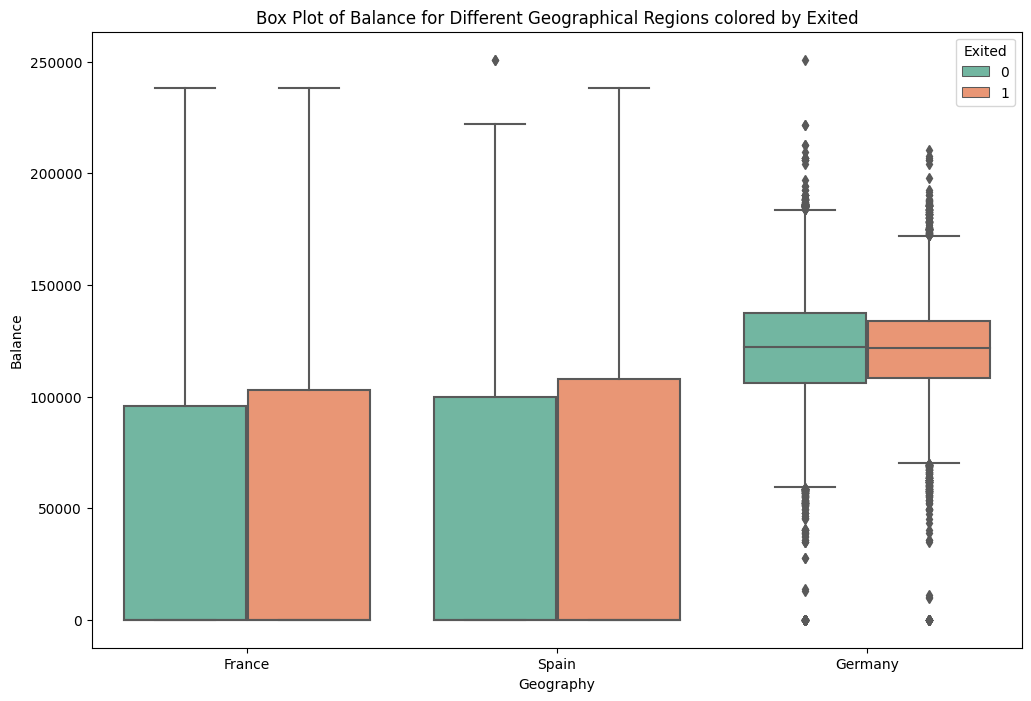

In [19]:
#Geography and Balance: Box Plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Geography', y='Balance', data=train_data, hue='Exited', palette='Set2')
plt.title('Box Plot of Balance for Different Geographical Regions colored by Exited')
plt.show()


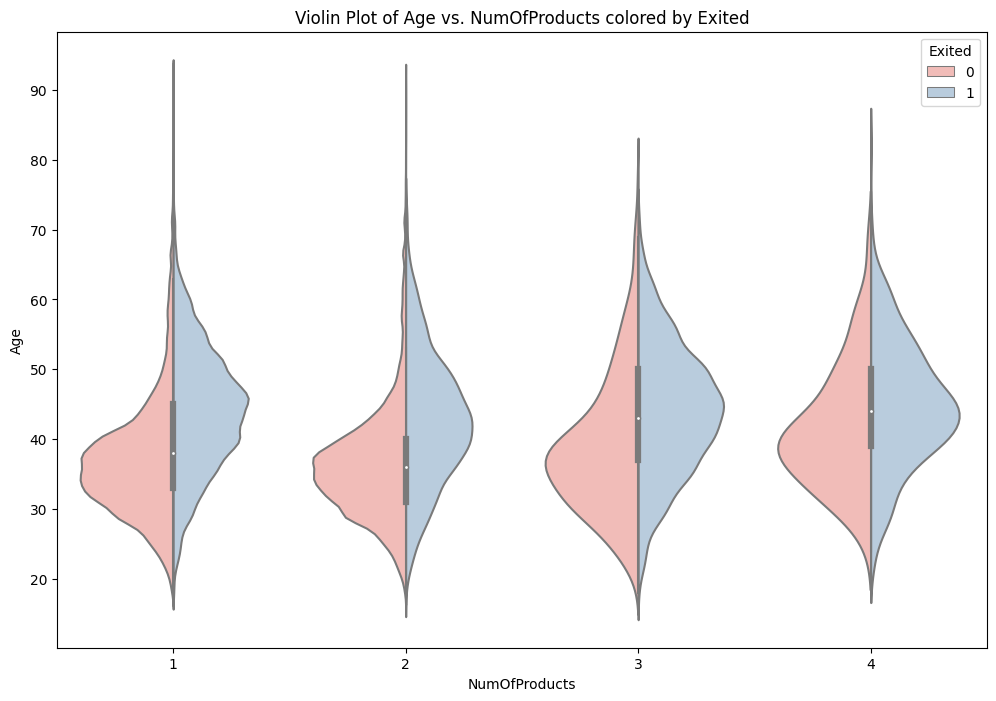

In [20]:
#NumOfProducts and Age: Violin Plot

plt.figure(figsize=(12, 8))
sns.violinplot(x='NumOfProducts', y='Age', data=train_data, hue='Exited', palette='Pastel1', split=True)
plt.title('Violin Plot of Age vs. NumOfProducts colored by Exited')
plt.show()


c:\ProgramData\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  This is separate from the ipykernel package so we can avoid doing imports until
c:\ProgramData\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  after removing the cwd from sys.path.


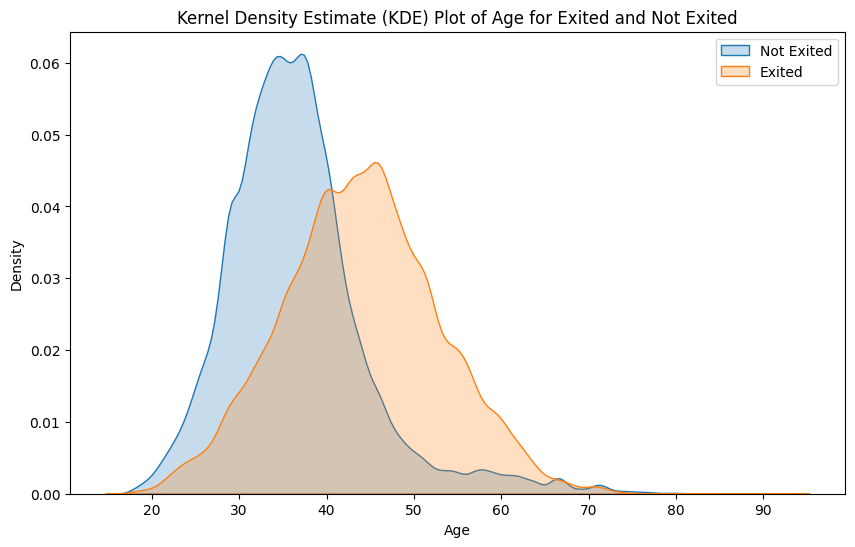

In [21]:
# Age Distribution by Exited Status: KDE Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(train_data[train_data['Exited'] == 0]['Age'], label='Not Exited', shade=True)
sns.kdeplot(train_data[train_data['Exited'] == 1]['Age'], label='Exited', shade=True)
plt.title('Kernel Density Estimate (KDE) Plot of Age for Exited and Not Exited')
plt.legend()
plt.show()


<a>Feature Selection and data cleaning

In [22]:
#Finding out the list of all Categorical columns in DataFrame
categorical_columns = train_data.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_columns)


Categorical Columns: ['Surname', 'Geography', 'Gender']


In [23]:
#Finding out the list of all non-numerical columns in DataFrame
non_numerical_columns = train_data.select_dtypes(exclude='number').columns.tolist()
print("Non-Numerical Columns:", non_numerical_columns)


Non-Numerical Columns: ['Surname', 'Geography', 'Gender']


In [ ]:
train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,1924,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,1925,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,1178,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,1299,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,467,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [27]:
from sklearn.preprocessing import LabelEncoder

# Combine training and test datasets for label encoding
combined_data = pd.concat([train_data, test_data], axis=0)

label_encoder = LabelEncoder()

# Check data types before applying label encoding
for col in categorical_columns:
    print(f"Data type of column '{col}': {combined_data[col].dtype}")

    # Check if the column is of object type (string)
    if combined_data[col].dtype == 'O':
        combined_data[col] = label_encoder.fit_transform(combined_data[col])

# Split the combined data back into training and test datasets
train_data_encoded = combined_data.iloc[:len(train_data)]
test_data_encoded = combined_data.iloc[len(train_data):]

# Make sure to assign the encoded values to the original datasets
train_data = train_data_encoded
test_data = test_data_encoded


Data type of column 'Surname': object
Data type of column 'Geography': object
Data type of column 'Gender': object


In [28]:
categorical_columns = train_data.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_columns)


Categorical Columns: []


In [31]:
train_data.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [32]:
# Correlation Analysis:
correlation_matrix = train_data.corr()
correlation_with_target = correlation_matrix['Exited'].abs().sort_values(ascending=False)
print(correlation_with_target)


Exited             1.000000
Age                0.340768
NumOfProducts      0.214554
IsActiveMember     0.210237
Gender             0.146442
Balance            0.129743
Geography          0.053343
Surname            0.028248
CreditScore        0.027383
HasCrCard          0.022141
Tenure             0.019565
EstimatedSalary    0.018827
CustomerId         0.009947
id                 0.002512
Name: Exited, dtype: float64


In [33]:
# Feature Importance (Tree-based models):
from sklearn.ensemble import RandomForestClassifier

X_train = train_data.drop(['Exited'], axis=1)
y_train = train_data['Exited']

model = RandomForestClassifier()
model.fit(X_train, y_train)

feature_importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(feature_importances)


Age                0.199453
NumOfProducts      0.140000
id                 0.089075
EstimatedSalary    0.088291
CustomerId         0.088058
Surname            0.086439
CreditScore        0.084044
Balance            0.075202
Tenure             0.047612
IsActiveMember     0.045690
Geography          0.028851
Gender             0.017322
HasCrCard          0.009962
dtype: float64


In [35]:
#Recursive Feature Elimination (RFE):

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

X_train = train_data.drop(['Exited'], axis=1)
y_train = train_data['Exited']

model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=5)  # Adjust the number of features to select
fit = rfe.fit(X_train, y_train)

selected_features = X_train.columns[fit.support_]
print(selected_features)


Index(['id', 'CustomerId', 'Age', 'NumOfProducts', 'EstimatedSalary'], dtype='object')


In [36]:
#SelectKBest (Statistical methods):

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2  # Use an appropriate statistical test

X_train = train_data.drop(['Exited'], axis=1)
y_train = train_data['Exited']

k_best = SelectKBest(score_func=chi2, k=5)  # Adjust the number of features to select
fit = k_best.fit(X_train, y_train)

selected_features = X_train.columns[fit.get_support()]
print(selected_features)


Index(['id', 'Surname', 'Age', 'Balance', 'EstimatedSalary'], dtype='object')


<h3>Summary of the selected features from each method:</h3>

Correlation Analysis:<br>
Top features: 'Age', 'NumOfProducts', 'IsActiveMember', 'Gender', 'Balance'

Tree-based Model (Random Forest):<br>
Top features: 'Age', 'NumOfProducts', 'id', 'EstimatedSalary', 'CustomerId'

Recursive Feature Elimination (RFE):<br>
Top features: 'id', 'CustomerId', 'Age', 'NumOfProducts', 'EstimatedSalary'

SelectKBest (Statistical methods):<br>
Top features: 'id', 'Surname', 'Age', 'Balance', 'EstimatedSalary'

In [40]:
X_train = train_data[['Age', 'NumOfProducts', 'IsActiveMember', 'Gender', 'Balance']]
y_train = train_data['Exited']
X_test = test_data[['Age', 'NumOfProducts', 'IsActiveMember', 'Gender', 'Balance']]


In [42]:
X_train1 = train_data.drop(['Exited'], axis=1)
y_train1 = train_data['Exited']
X_test1 = test_data

In [41]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)


In [44]:

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

In [46]:
# Linear Regression (for regression tasks, not classification)
# Assuming a regression task based on the choice of Linear Regression
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)
linreg_pred = linreg_model.predict(X_test)

In [66]:
# Support Vector Machine (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)



In [49]:
# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)



In [50]:
# XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)



In [52]:
# Standardize data for neural networks
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [53]:
# Multi-layer Perceptron (DNN)
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(random_state=42)
mlp_model.fit(X_train_scaled, y_train)
mlp_pred = mlp_model.predict(X_test_scaled)



In [67]:
# Print or use the predictions as needed
print("Decision Tree Predictions:", dt_pred)
print("Logistic Regression Predictions:", lr_pred)
print("Linear Regression Predictions:", linreg_pred)
print("SVM Predictions:", svm_pred)
print("Gradient Boosting Predictions:", gb_pred)
print("XGBoost Predictions:", xgb_pred)
print("DNN (MLP) Predictions:", mlp_pred)

Decision Tree Predictions: [0. 1. 0. ... 0. 0. 0.]
Logistic Regression Predictions: [0. 1. 0. ... 0. 0. 1.]
Linear Regression Predictions: [-0.10574049  0.50676872  0.21785558 ...  0.07952181  0.13960153
  0.40422071]
SVM Predictions: [0. 0. 0. ... 0. 0. 0.]
Gradient Boosting Predictions: [0. 1. 0. ... 0. 0. 0.]
XGBoost Predictions: [0 1 0 ... 0 0 0]
DNN (MLP) Predictions: [0. 1. 0. ... 0. 0. 0.]


In [56]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, Dropout
from sklearn.preprocessing import StandardScaler


X_train = train_data.drop(['Exited'], axis=1)
y_train = train_data['Exited']
X_test = test_data

# Check and adjust columns to ensure consistency
common_columns = set(X_train.columns) & set(X_test.columns)
X_train = X_train[common_columns]
X_test = X_test[common_columns]

# Standardize data for neural networks
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:

# Reshape data for CNN
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

In [59]:
# CNN Model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
cnn_model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.2)



Epoch 1/10
4126/4126 [==============================] - 21s 3ms/step - loss: 0.4140 - accuracy: 0.8249 - val_loss: 0.4061 - val_accuracy: 0.8268
Epoch 2/10
4126/4126 [==============================] - 13s 3ms/step - loss: 0.4024 - accuracy: 0.8321 - val_loss: 0.4006 - val_accuracy: 0.8302
Epoch 3/10
4126/4126 [==============================] - 14s 3ms/step - loss: 0.3999 - accuracy: 0.8327 - val_loss: 0.4010 - val_accuracy: 0.8309
Epoch 4/10
4126/4126 [==============================] - 14s 3ms/step - loss: 0.3989 - accuracy: 0.8341 - val_loss: 0.4040 - val_accuracy: 0.8294
Epoch 5/10
4126/4126 [==============================] - 16s 4ms/step - loss: 0.3973 - accuracy: 0.8340 - val_loss: 0.4011 - val_accuracy: 0.8315
Epoch 6/10
4126/4126 [==============================] - 16s 4ms/step - loss: 0.3969 - accuracy: 0.8347 - val_loss: 0.3974 - val_accuracy: 0.8309
Epoch 7/10
4126/4126 [==============================] - 14s 3ms/step - loss: 0.3961 - accuracy: 0.8347 - val_loss: 0.4017 - val_ac

In [60]:
# DNN Model
dnn_model = Sequential()
dnn_model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
dnn_model.add(Dropout(0.5))
dnn_model.add(Dense(64, activation='relu'))
dnn_model.add(Dropout(0.5))
dnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
dnn_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)



Epoch 1/10
4126/4126 [==============================] - 14s 3ms/step - loss: 0.3788 - accuracy: 0.8401 - val_loss: 0.3390 - val_accuracy: 0.8552
Epoch 2/10
4126/4126 [==============================] - 13s 3ms/step - loss: 0.3477 - accuracy: 0.8550 - val_loss: 0.3335 - val_accuracy: 0.8581
Epoch 3/10
4126/4126 [==============================] - 14s 3ms/step - loss: 0.3416 - accuracy: 0.8576 - val_loss: 0.3313 - val_accuracy: 0.8604
Epoch 4/10
4126/4126 [==============================] - 14s 3ms/step - loss: 0.3403 - accuracy: 0.8585 - val_loss: 0.3343 - val_accuracy: 0.8551
Epoch 5/10
4126/4126 [==============================] - 12s 3ms/step - loss: 0.3398 - accuracy: 0.8585 - val_loss: 0.3290 - val_accuracy: 0.8601
Epoch 6/10
4126/4126 [==============================] - 13s 3ms/step - loss: 0.3387 - accuracy: 0.8593 - val_loss: 0.3274 - val_accuracy: 0.8616
Epoch 7/10
4126/4126 [==============================] - 14s 3ms/step - loss: 0.3374 - accuracy: 0.8594 - val_loss: 0.3289 - val_ac

In [61]:
# Make predictions
cnn_pred = cnn_model.predict(X_test_reshaped)
dnn_pred = dnn_model.predict(X_test_scaled)



3439/3439 [==============================] - 3s 842us/step


In [62]:
# Convert predictions to binary (0 or 1)
cnn_pred_binary = [1 if pred > 0.5 else 0 for pred in cnn_pred.flatten()]
dnn_pred_binary = [1 if pred > 0.5 else 0 for pred in dnn_pred.flatten()]



In [63]:
# Print or use the predictions as needed
print("CNN Predictions:", cnn_pred_binary)
print("DNN Predictions:", dnn_pred_binary)

CNN Predictions: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [69]:
import pandas as pd

# Assuming test_data['id'] contains the IDs for the test set

# Create DataFrames for each model's predictions
dt_submission = pd.DataFrame({'id': test_data['id'], 'Exited': dt_pred})
lr_submission = pd.DataFrame({'id': test_data['id'], 'Exited': lr_pred})
svm_submission = pd.DataFrame({'id': test_data['id'], 'Exited': svm_pred})
gb_submission = pd.DataFrame({'id': test_data['id'], 'Exited': gb_pred})
xgb_submission = pd.DataFrame({'id': test_data['id'], 'Exited': xgb_pred})
cnn_submission = pd.DataFrame({'id': test_data['id'], 'Exited': cnn_pred_binary})
dnn_submission = pd.DataFrame({'id': test_data['id'], 'Exited': dnn_pred_binary})




In [70]:
# Save each submission to a CSV file
dt_submission.to_csv('dt_submission.csv', index=False)
lr_submission.to_csv('lr_submission.csv', index=False)
svm_submission.to_csv('svm_submission.csv', index=False)
gb_submission.to_csv('gb_submission.csv', index=False)
xgb_submission.to_csv('xgb_submission.csv', index=False)
cnn_submission.to_csv('cnn_submission.csv', index=False)
dnn_submission.to_csv('dnn_submission.csv', index=False)